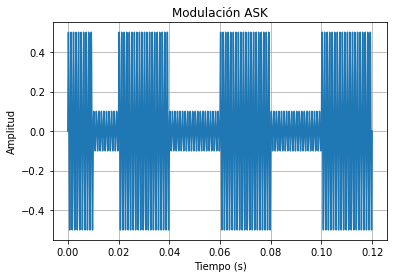

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f_carrier = 1000   # Frecuencia de la portadora en Hz
f_bit = 100        # Frecuencia del bit en Hz
bit_rate = 1 / f_bit  # Velocidad de transmisión en segundos por bit
amplitude_1 = 0.5    # Amplitud para bit 1
amplitude_0 = 0.1    # Amplitud para bit 0

# Duración de cada bit
t = np.linspace(0, bit_rate, 1000)

# Mensaje a modular (en binario)
message = '101100110011'

# Convertir el mensaje a una lista de bits
binary_data = [int(bit) for bit in message]

# Señal modulada ASK
modulated_signal = np.array([])
for bit in binary_data:
    if bit == 0:
        modulated_signal = np.append(modulated_signal, amplitude_0 * np.cos(2 * np.pi * f_carrier * t))
    else:
        modulated_signal = np.append(modulated_signal, amplitude_1 * np.cos(2 * np.pi * f_carrier * t))

# Tiempo total de la señal
total_time = len(binary_data) * bit_rate

# Eje de tiempo para la señal modulada
time = np.linspace(0, total_time, len(modulated_signal))



# Graficar la señal modulada ASK

plt.title('Modulación ASK')
plt.plot(time, modulated_signal)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


Mensaje recibido: 101100110011


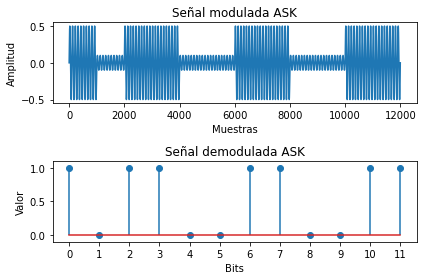

In [9]:
# Demodulación ASK
demodulated_signal = []
for i in range(len(binary_data)):
    # Índices de la señal modulada correspondientes al bit actual
    start_index =   i * len(t)
    end_index   = (i + 1) * len(t)
    
    # Señal modulada correspondiente al bit actual
    bit_signal = modulated_signal[start_index:end_index]
    
    # Cálculo de la energía para los bits 1 y 0
    energy_1 = np.sum(bit_signal ** 2)
    energy_0 = np.sum((bit_signal - amplitude_1 * np.cos(2 * np.pi * f_carrier * t)) ** 2)
    
    # Comparación de energía para determinar el bit recibido
    if energy_1 > energy_0:
        demodulated_signal.append(1)
    else:
        demodulated_signal.append(0)

# Convertir la lista de bits demodulados a una cadena
received_message = ''.join([str(bit) for bit in demodulated_signal])

# Imprimir el mensaje recibido
print("Mensaje recibido:", received_message)

# Graficar la señal modulada ASK
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, len(modulated_signal)), modulated_signal)
plt.title('Señal modulada ASK')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

# Graficar la señal demodulada ASK
plt.subplot(2, 1, 2)
plt.stem(np.arange(0, len(demodulated_signal)), demodulated_signal, use_line_collection=True)
plt.title('Señal demodulada ASK')
plt.xlabel('Bits')
plt.ylabel('Valor')
plt.ylim(-0.1, 1.1)
plt.xticks(np.arange(0, len(demodulated_signal)))
plt.tight_layout()
plt.show()

